
# Business  Analytics project

for Yandex.Afisha. The goal is to optimize marketing expenses.

I am going to study:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

### Content plan
1. [Step1](#Step1) Study and optimize the given data
2. [Step2](#Step2) Calculating DAO, WAO, MAO
3. [Step3](#Step3) Time to conversion, average number and average size of purchases
4. [Step4](#Step4) LTV per first order month cohorts and LTV per sources
5. [Step5](#Step5) CAC and ROMI
4. [Overall conclusion](#oc)


### Step1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
visits = pd.read_csv('/datasets/visits_log_us.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [2]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


It's better to rename columns to more convenient format, and also changing the data type in columns Start Ts and End Ts to datetime type is needed

In [3]:
visits.set_axis(['device','end_ts','source_id', 'start_ts', 'uid'], axis='columns', inplace=True)

In [4]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [5]:
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


For this dataframe i'm going to repeat previous steps and rename columns and change datatype

In [7]:
orders.set_axis(['buy_ts','revenue', 'uid'], axis='columns', inplace=True)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
costs = pd.read_csv('/datasets/costs_us.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Only datatype changing is needed

In [10]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Now the data is ready for further analysis

### Step2

We are going to find out all about how people use the product. 
First question is how many people use it every day, week, and month. I'm going to calculate DAO, WAO and MAO

In [11]:
visits['visits_year']  = visits['start_ts'].dt.year
visits['visits_month'] = visits['start_ts'].dt.month
visits['visits_week']  = visits['start_ts'].dt.week
visits['visits_date'] = visits['start_ts'].dt.date
dau = visits.groupby('visits_date').agg({'uid': 'nunique'}).mean()
int(dau)

907

In [12]:
wau = visits.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).mean()
int(wau)

5716

In [13]:
mau = visits.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).mean()
int(mau)

23228

907 unique visitors per day, 5716 per week and 23,228 per month.

Let's calculate the sticky factor to find out how often people return to the app.

In [14]:
sticky_wau = dau/wau*100
int(sticky_wau)

15

In [15]:
sticky_mau = dau/mau*100
int(sticky_mau)

3

A fairly large number of users remain in the application after a week or a month. Let's see what's more used during the month   desktop or touch.

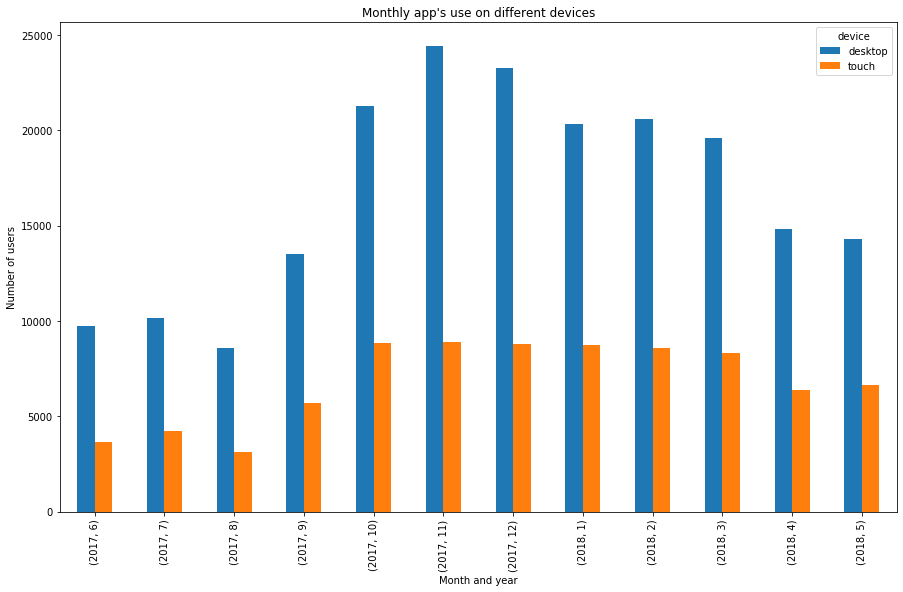

In [16]:
mau_device = visits.pivot_table(index=['visits_year', 'visits_month'], columns='device', values='uid', aggfunc='nunique')
ax = mau_device.plot(kind='bar', figsize=(15,9), title = "Monthly app's use on different devices")
xlab = ax.set_xlabel('Month and year')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4cAAAJQCAYAAAA9oRG1AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzde7hdVXkv/u8rAQIVEkRABCRUgUKRICR44aq0gIJQfOR2WgGroiIePEdRaq0iwim1aq1XxCOCigXBFkGwCCKiP4+YRKNyVcBQgijINUUuAcbvjzWDi2TvZOey9s4On8/z7CdrjTnnmO8ce6H5Zow5V7XWAgAAwNPbM8a6AAAAAMaecAgAAIBwCAAAgHAIAABAhEMAAAAiHAIAABDhEIDFqKpWVS8YZttRVfWD0a6JRVXViVX1le7186rqv6tqte79RlV1VVXNq6qPVs8Xq+reqvrx2FY+Mov7HC5FH08ZFwAWJRwCjANVNaeqHq2qZy/U/tPuL85TVsA5rqyqNy5vP2OpqvasqivHuo6x1Fr7r9baM1trj3dNRyf5fZJ1W2vvTLJrkr9MsmlrbefRrq/7LP/FaJ93iHEBYCHCIcD48eskhy94U1UvTLL22JXDOLF5kutaa63v/ZzW2oNL21FVTVihlQGwUhEOAcaPLyc5ou/9kUm+1L9DVU2qqi9V1V1VdWtVva+qntFtO6qqflBVH+mWFP66ql7ZbTslyW5JPtUtvftUX7d/UVW/qqr7qurTVVULF9a1f3Shtgur6n8NdSFV9a9VdVtVPVBVs6pqt75tJ1bV+VV1brcU8idVNbVv+5yq+ruquq67ji9W1cQhzlFV9S9VdWd3nl9U1XbD1POU2ayFlmlOrKqvVNXd3RjMqKqN+sb7C1V1R1XdXlUnD7dssarWrKqPV9Vvup+PV9Wa3bY9q2puVb2zq/eOqnr9UP10+29RVd/rxueyJM/u2zalm02eUFVnpvc5eXf3e31zkv+b5KXd+w92x+xfVbO76/thVW2/0Ni8p6p+nuTBrt/nVtXXu8/Zr6vqfy40dl/rPofzquraqprWbftykucluag7/7uHub7juzH4TVX97RDj+JGq+q+q+l1VnVZVa3Xbrq+q/fv2ndDVuGP/uHTbntV9dn7TfY4u6DtucePxnu53Pa+qbqyqvYb7PQGMN8IhwPjxoyTrVtU2XQA5LMlXFtrnk0kmJfnTJHukFyb7Q8aLk9yYXpj4cJIvVFW11v4+yfeTHNstvTu275j9k0xPsn2SQ5LsM0RtZyU5vP4YRJ+d5C+SfHWYa5mRZIckz+r2OW+hgHdgkvP6tl9QVav3bf/rro7nJ9kqyfuSpLV2ZWttz26fvZPs3m2f1NV+9zD1LM6R3fGbJVk/yVuSPNRtOzPJY0lekORF3TmHW5r790lekt51T02y84K6O8/pzrNJkjck+XRVrTdMX19NMiu93+OHuhoX0Vo7KsnZST7c/V4/19X//7r3H6iqFyU5I8mbu+v7XJILFwTXzuFJ9ksyOckTSS5K8rOu1r2SvKOq+j8XByQ5p9v/wiSf6up5XZL/SvLq7vwfXrjmqto3ybvSW/q6ZXqfo36npvc73SG9cd8kyfu7bf+Wvtn19D4jv2+t/WSI4flyejPvf55kwyT/0p1/2PGoqq2THJtkemttna7/OUP0DTAuCYcA48uC2cO/THJ9ktsXbOgLjH/XWpvXWpuT5KNJXtd3/K2ttc93912dlWTjJBst4Zynttbua639V5LvpveX8qdorf04yf3pBYV0dVzZWvvdUB221r7SWru7tfZYa+2jSdZMsnXfLrNaa+e31uYn+ViSiekFqwU+1Vq7rbV2T5JT8tRAsMD8JOsk+bMk1Vq7vrV2xxKudSjz0wsJL2itPd5am9Vae6CbPXxVkne01h5srd2ZXsA4bJh+/jrJSa21O1trdyX5YJ76u5nfbZ/fWrskyX/nqWOSpPdglfTC+j+01h5prV2VXlhbVkcn+Vxr7eru+s5K8kieOt6f6Mb7oe7cG7TWTmqtPdpauyXJ5xe67h+01i7pPmdfTi8Mj9QhSb7YWrumW/p64oINVVVdvf+rtXZPa21ekv/Td+6vJjmgqhYst/4f6QXGp6iqjZO8MslbWmv3dmP+vRGMx+PpfVa3rarVW2tzWms3L8W1AazUhEOA8eXL6f2F96gstKQ0vVmk1ZPc2td2a3ozKwv8dsGL1tofupfPXMI5f9v3+g+L2f+sJH/Tvf6brtYhVdW7uiWA91fVfenNmPU/bOe2vjqfSDI3yXOH2p7eNfZvW3DcFenNWH06yZ1VdXpVrTtcTYvx5SSXJjmnW4L44W4Wc/P0xvuObvnhfenNMm04TD/PzaK/m/66726tPdb3frixfm6Sexe6Z/DWIfYbqc2TvHPBNXTXsVmGH+/Nkzx3of3fm6f+I8PCn5mJNfL7FZ+bRX+/C2yQ3mzfrL5z/2fXntbaTen9o8mru4B4QIaevd4syT2ttXuH2DbseHT9vyO9wHpnVZ1TVYt89gDGK+EQYBxprd2a3oNpXpXk3xfa/Pv0Zp8272t7XvpmF5fU/XKW95UkB1bv/sBtklww1E7Vu7/w3enNEK3XWpuc3qxj/72Mm/Xt/4wkmyb5zVDb07vG/m1Paq19orW2U5Jt01uKePwwtT+Ypz7c5zl9fcxvrX2wtbZtkpelt8z2iPQCzCNJnt1am9z9rNta+/NhzvGbLPq7GbLuJbgjyXpV9ScL9bWsbktySt81TG6trd1a659xawvt/+uF9l+ntfaqEZ5vSZ+zO7Lo73eB36e3pPfP+849qbXWH6IXLC09ML0H8dw0xDluS/Ksqpo8zLZhx6O19tXW2q7p/S5bkn9awvUAjBvCIcD484Ykr1j4aZPdEr6vJTmlqtapqs2T/O8sel/icH6X3r2Ky6S1Nje9ewm/nOTr3RLEoayT3n16dyWZUFXvT7LwjN5OVfWabrbpHemFsB/1bX9bVW1aVc9K716+cxc+SVVNr6oXd7N8DyZ5OL375YYyO8lhVbV69/CU1/b18/KqemG3bPeB9AL4E90S1W8n+WhVrVtVz6iq51fVHsOc49+SvK+qNujuyXx/Rv67eVL3DwQzk3ywqtaoql2TvHpp++nz+SRv6caqqupPqmq/qlpnmP1/nGRe92CWtapqtararqqmj/B8S/qcfS3JUVW1bTf794EFG7pZ5M8n+Zeq2jBJqmqThe53PCe9ez/fmmHuee1+d99K8pmqWq/7ve/ebR52PKpq66p6RXc/5sPpBdXhPlMA445wCDDOtNZubq3NHGbz29MLQrck+UF6fzk+Y4Rd/2uS13ZPbvzEMpZ3VpIXZjFLStNbovmfSX6Z3pLBh/PUZYRJ8o0khya5N7378l7T3X+4wFfTC2a3JLk5yclDnGfd9P6if293nruT/PMwNf1Deg+3uTe9ewH7Q8VzkpyfXjC8Psn3+q7viCRrJLmuO/b89O7jHMrJ6YW6nyf5RZKfDFP3SPyP9B4udE964WnhJcYj1n2W3pTeEtx7k9yU3rLl4fZ/PL3Z0x3Sm8X+fXpPQJ00wlP+Y3oh+b6qetcQ/X8ryceTXNHVcsVCu7yna/9RVT2Q5PL03ZvZBb//l94s7yL/aNDndekF/RuS3JneP0IsaTzWTO+BOL9Pb+nshkn+bmSXDbDyqz9+7REALJ9u9uUrSTZvy/h/MFV1YnoPf/mbYbbPSfLG1trly1onALAoM4cArBDd8s3jkvzfZQ2GAMDYEQ4BWG5VtU2S+9JbUvnxMS4HAFgGlpUCAABg5hAAAIBkpF9Iu8p49rOf3aZMmTLWZQAAAIyJWbNm/b61tsHC7U+7cDhlypTMnDncE+ABAABWbVV161DtlpUCAAAgHAIAACAcAgAAkKfhPYcAAMD4NX/+/MydOzcPP/zwWJey0ps4cWI23XTTrL766iPaXzgEAADGjblz52adddbJlClTUlVjXc5Kq7WWu+++O3Pnzs0WW2wxomMsKwUAAMaNhx9+OOuvv75guARVlfXXX3+pZliFQwAAYFwRDEdmacdJOAQAAGBw4bCqNquq71bVdVV1bVUd17WfWFW3V9Xs7udVfcf8XVXdVFU3VtU+fe37dm03VdUJfe1bVNXVXfu5VbXGoK4HAAB4+jjxxBPzkY98ZKmPe//735/LL798ABUN3iAfSPNYkne21n5SVeskmVVVl3Xb/qW19pSRrqptkxyW5M+TPDfJ5VW1Vbf500n+MsncJDOq6sLW2nVJ/qnr65yqOi3JG5J8doDXBAAAMKyTTjpprEtYZgObOWyt3dFa+0n3el6S65NssphDDkxyTmvtkdbar5PclGTn7uem1totrbVHk5yT5MDqLaB9RZLzu+PPSvJXg7kaAABgVXfKKadkq622yq677pobb7wxSXLzzTdn3333zU477ZTddtstN9xwQ+6///5svvnmeeKJJ5IkDz74YDbbbLPMnz8/Rx11VM4/vxdRZsyYkZe97GWZOnVqdt5558ybNy+PP/54jj/++EyfPj3bb799Pve5z43Z9S5sVL7KoqqmJHlRkquT7JLk2Ko6IsnM9GYX700vOP6o77C5+WOYvG2h9hcnWT/Jfa21x4bYf+HzH53k6CR53vOet/wXBAAArFJmzZqVc845J7Nnz85jjz2WHXfcMTvttFOOPvronHbaadlyyy1z9dVX55hjjskVV1yRHXbYId/73vfy8pe/PN/85jezzz77POX7BB999NEceuihOffcczN9+vQ88MADWWuttfKFL3whkyZNyowZM/LII49kl112yd577z3ir5sYpIGHw6p6ZpKvJ3lHa+2Bqvpskg8lad2fH03yt4OsobV2epLTk2TatGltkOcCAADGn+9///s56KCDsvbaaydJDjjggDz88MP54Q9/mIMPPvjJ/R555JEkeTL4vfzlL88555yTY4455in93Xjjjdl4440zffr0JMm6666bJPn2t7+dn//850/OLt5///351a9+teqHw6paPb1geHZr7d+TpLX2u77tn0/yze7t7Uk26zt8064tw7TfnWRyVU3oZg/79wcAAFguTzzxRCZPnpzZs2cvsu2AAw7Ie9/73txzzz2ZNWtWXvGKV4yoz9ZaPvnJT2afffZZ8s6jbJBPK60kX0hyfWvtY33tG/ftdlCSa7rXFyY5rKrWrKotkmyZ5MdJZiTZsnsy6RrpPbTmwtZaS/LdJK/tjj8yyTcGdT0AAMCqa/fdd88FF1yQhx56KPPmzctFF12UtddeO1tssUXOO++8JL1g97Of/SxJ8sxnPjPTp0/Pcccdl/333z+rrbbaU/rbeuutc8cdd2TGjBlJknnz5uWxxx7LPvvsk89+9rOZP39+kuSXv/xlHnzwwVG80uENcuZwlySvS/KLqloQtd+b5PCq2iG9ZaVzkrw5SVpr11bV15Jcl96TTt/WWns8Sarq2CSXJlktyRmttWu7/t6T5JyqOjnJT9MLowAAAEtlxx13zKGHHpqpU6dmww03fHI56Nlnn523vvWtOfnkkzN//vwcdthhmTp1apLe0tKDDz44V1555SL9rbHGGjn33HPz9re/PQ899FDWWmutXH755XnjG9+YOXPmZMcdd0xrLRtssEEuuOCC0bzUYVVvAu7pY9q0aW3mzJljXQYAALAMrr/++myzzTZjXca4MdR4VdWs1tq0hfcd2LJSAAAAxg/hEAAAAOEQAAAA4RAAAIAIhwAAAGSwX2UBAMttygkXL3cfc07dbwVUAgCrNuEQAAAYt1bEPyL2W5Z/UDzxxBPzzGc+M+9617tGfMyZZ56ZmTNn5lOf+tRT2i+44IJstdVW2XbbbZe6juVlWSkAAMBK4oILLsh11103JucWDgEAAJbSKaeckq222iq77rprbrzxxiTJzTffnH333Tc77bRTdtttt9xwww1JkvPOOy/bbbddpk6dmt13332Rvi6++OK89KUvzVVXXZULL7wwxx9/fHbYYYfcfPPNmT17dl7ykpdk++23z0EHHZR77703SbLnnnvmuOOOyw477JDtttsuP/7xj5f7miwrBQAAWAqzZs3KOeeck9mzZ+exxx7LjjvumJ122ilHH310TjvttGy55Za5+uqrc8wxx+SKK67ISSedlEsvvTSbbLJJ7rvvvqf09R//8R/52Mc+lksuuSTrrbdeDjjggOy///557WtfmyTZfvvt88lPfjJ77LFH3v/+9+eDH/xgPv7xjydJ/vCHP2T27Nm56qqr8rd/+7e55pprluu6hEMAAICl8P3vfz8HHXRQ1l577STJAQcckIcffjg//OEPc/DBBz+53yOPPJIk2WWXXXLUUUflkEMOyWte85ont19xxRWZOXNmvv3tb2fddddd5Dz3339/7rvvvuyxxx5JkiOPPPIp/R9++OFJkt133z0PPPBA7rvvvkyePHmZr0s4BAAAWE5PPPFEJk+enNmzZy+y7bTTTsvVV1+diy++ODvttFNmzZqVJHn+85+fW265Jb/85S8zbdq0pT5nVS32/dJyzyEAAMBS2H333XPBBRfkoYceyrx583LRRRdl7bXXzhZbbJHzzjsvSdJay89+9rMkvXsRX/ziF+ekk07KBhtskNtuuy1Jsvnmm+frX/96jjjiiFx77bVJknXWWSfz5s1LkkyaNCnrrbdevv/97ydJvvzlLz85i5gk5557bpLkBz/4QSZNmpRJkyYt13WZOQQAAMatsfgu2x133DGHHnpopk6dmg033DDTp09Pkpx99tl561vfmpNPPjnz58/PYYcdlqlTp+b444/Pr371q7TWstdee2Xq1KlPzjD+2Z/9Wc4+++wcfPDBueiii3LYYYflTW96Uz7xiU/k/PPPz1lnnZW3vOUt+cMf/pA//dM/zRe/+MUn65g4cWJe9KIXZf78+TnjjDOW+7qqtbbcnYwn06ZNazNnzhzrMgAYoRXx/VVj8RcHAAbj+uuvzzbbbDPWZYy5PffcMx/5yEeWuBx1qPGqqlmttUUOtKwUAAAAy0oBAADGmyuvvHKF92nmEAAAAOEQAAAA4RAAAIAIhwAAAMQDaQAAgPHsxOX74vdF+7t/sZvvu+++fPWrX80xxxyzwk555plnZubMmfnUpz61wvpcFmYOAQAARui+++7LZz7zmbEuYyCEQwAAgBE64YQTcvPNN2eHHXbI8ccfn+OPPz7bbbddXvjCF+bcc89N0vuaif333//JY4499ticeeaZSZIZM2bkZS97WaZOnZqdd9458+bNS5L85je/yb777pstt9wy7373u0f9uhLLSgEAAEbs1FNPzTXXXJPZs2fn61//ek477bT87Gc/y+9///tMnz49u++++7DHPvroozn00ENz7rnnZvr06XnggQey1lprJUlmz56dn/70p1lzzTWz9dZb5+1vf3s222yz0bqsJGYOAQAAlskPfvCDHH744VlttdWy0UYbZY899siMGTOG3f/GG2/MxhtvnOnTpydJ1l133UyY0Juv22uvvTJp0qRMnDgx2267bW699dZRuYZ+wiEAAMAKNGHChDzxxBNPvn/44YeXeMyaa6755OvVVlstjz322EBqWxzLSgFgHJpywsXL3cecU/dbAZUAPL2ss846T94nuNtuu+Vzn/tcjjzyyNxzzz256qqr8s///M+ZP39+rrvuujzyyCN56KGH8p3vfCe77rprtt5669xxxx2ZMWNGpk+fnnnz5j25rHRlIBwCAADj1xK+emJFW3/99bPLLrtku+22yytf+cpsv/32mTp1aqoqH/7wh/Oc5zwnSXLIIYdku+22yxZbbJEXvehFSZI11lgj5557bt7+9rfnoYceylprrZXLL798VOtfnGqtjXUNo2ratGlt5syZY10GACNkhmxoxgV4urr++uuzzTbbjHUZ48ZQ41VVs1pr0xbe1z2HAAAACIcAAAAIhwAAwDjzdLs1blkt7TgJhwAAwLgxceLE3H333QLiErTWcvfdd2fixIkjPsbTSgEAgHFj0003zdy5c3PXXXeNdSkrvYkTJ2bTTTcd8f7CIQAAMG6svvrq2WKLLca6jFWSZaUAAAAIhwAAAAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAABJJox1AQD0TDnh4hXSz5xT91sh/QAATy9mDgEAABAOAQAAEA4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAkgljXQAAAIMz5YSLV0g/c07db4X0A6y8zBwCAAAgHAIAACAcAgAAEOEQAACAeCANALCK8OAVgOVj5hAAAADhEAAAgAGGw6rarKq+W1XXVdW1VXVc1/6sqrqsqn7V/ble115V9Ymquqmqfl5VO/b1dWS3/6+q6si+9p2q6hfdMZ+oqhrU9QAAAKzKBjlz+FiSd7bWtk3ykiRvq6ptk5yQ5DuttS2TfKd7nySvTLJl93N0ks8mvTCZ5ANJXpxk5yQfWBAou33e1HfcvgO8HgAAgFXWwMJha+2O1tpPutfzklyfZJMkByY5q9vtrCR/1b0+MMmXWs+Pkkyuqo2T7JPkstbaPa21e5NclmTfbtu6rbUftdZaki/19QUAAMBSGJV7DqtqSpIXJbk6yUattTu6Tb9NslH3epMkt/UdNrdrW1z73CHahzr/0VU1s6pm3nXXXct1LQAAAKuigYfDqnpmkq8neUdr7YH+bd2MXxt0Da2101tr01pr0zbYYINBnw4AAGDcGWg4rKrV0wuGZ7fW/r1r/l23JDTdn3d27bcn2azv8E27tsW1bzpEOwAAAEtpkE8rrSRfSHJ9a+1jfZsuTLLgiaNHJvlGX/sR3VNLX5Lk/m756aVJ9q6q9boH0eyd5NJu2wNV9ZLuXEf09QUAAMBSmDDAvndJ8rokv6iq2V3be5OcmuRrVfWGJLcmOaTbdkmSVyW5Kckfkrw+SVpr91TVh5LM6PY7qbV2T/f6mCRnJlkrybe6HwAAAJbSwMJha+0HSYb73sG9hti/JXnbMH2dkeSMIdpnJtluOcoEAAAgo/S0UgAAAFZuwiEAAAADvecQAABWSlNOuHi5+5hz6n4roBJYeZg5BAAAQDgEAABAOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgAwyHVXVGVd1ZVdf0tZ1YVbdX1ezu51V92/6uqm6qqhurap++9n27tpuq6oS+9i2q6uqu/dyqWmNQ1wIAALCqG+TM4ZlJ9h2i/V9aazt0P5ckSVVtm+SwJH/eHfOZqlqtqlZL8ukkr0yybZLDu32T5J+6vl6Q5N4kbxjgtQAAAKzSBhYOW2tXJblnhLsfmOSc1tojrbVfJ7kpyc7dz02ttVtaa48mOSfJgVVVSV6R5Pzu+LOS/NUKvQAAAICnkbG45/DYqvp5t+x0va5tkyS39e0zt2sbrn39JPe11h5bqB0AAIBlMNrh8LNJnp9khyR3JPnoaJy0qo6uqplVNfOuu+4ajVMCAACMK0sMh1X1/Kpas3u9Z1X9z6qavCwna639rrX2eGvtiSSfT2/ZaJLcnmSzvl037dqGa787yeSqmrBQ+3DnPb21Nq21Nm2DDTZYltIBAABWaSOZOfx6kser6gVJTk8vrH11WU5WVRv3vT0oyYInmV6Y5LCqWrOqtkiyZZIfJ5mRZMvuyaRrpPfQmgtbay3Jd5O8tjv+yCTfWJaaAAAASCYseZc80Vp7rKoOSvLJ1tonq+qnSzqoqv4tyZ5Jnl1Vc5N8IMmeVbVDkpZkTpI3J0lr7dqq+lqS65I8luRtrbXHu36OTXJpktWSnNFau7Y7xXuSnFNVJyf5aZIvjPCaAQCAIUw54eLl7mPOqfutgEoYCyMJh/Or6vD0Zude3bWtvqSDWmuHD9E8bIBrrZ2S5JQh2i9JcskQ7bfkj8tSAQAAWA4jWVb6+iQvTXJKa+3X3bLPLw+2LAAAAEbTYmcOuy+h//vW2l8vaOu+h/CfBl0YAAAAo2exM4fdfX+bdw+DAQAAYBU1knsOb0ny/1XVhUkeXNDYWvvYwKoCAABgVI0kHN7c/TwjyTqDLQcAAICxsMRw2Fr7YJJU1dqttT8MviQAAABG2xKfVlpVL62q65Lc0L2fWlWfGXhlAAAAjJqRfJXFx5Psk+TuJGmt/SzJ7oMsCgAAgNE1knsO01q7rar6mx4fTDkAAAArjyknXLxC+plz6n4rpJ9BGkk4vK2qXpakVdXqSY5Lcv1gywIAAGA0jWRZ6VuSvC3JJkluT7JD9x4AAIBVxEieVvr7JH89CrUAAAAwRkbytNIPV9W6VbV6VX2nqu6qqr8ZjeIAAAAYHSNZVrp3a+2BJPsnmZPkBUmOH2RRAAAAjK6RhMMFS0/3S3Jea+3+AdYDAADAGH+D3zYAACAASURBVBjJ00q/WVU3JHkoyVuraoMkDw+2LAAAAEbTEmcOW2snJHlZkmmttflJHkxy4KALAwAAYPQsceawqo7oe92/6UuDKAgAAIDRN5JlpdP7Xk9MsleSn0Q4BAAAWGWM5HsO397/vqomJzlnYBUBAAAw6kbytNKFPZhkixVdCAAAAGNnJPccXpSkdW+fkWTbJF8bZFEAAACMrpHcc/iRvtePJbm1tTZ3QPUAAAAwBkZyz+H3RqMQ4OljygkXr5B+5py63wrpBwCAZbvnEAAAgFWMcAgAAMDw4bCqvtP9+U+jVw4AAABjYXH3HG5cVS9LckBVnZOk+je21n4y0MoAAAAYNYsLh+9P8g9JNk3ysYW2tSSvGFRRAAAAjK5hw2Fr7fwk51fVP7TWPjSKNQEAADDKRvJVFh+qqgOS7N41Xdla++ZgywIAAGA0LfFppVX1j0mOS3Jd93NcVf2fQRcGAADA6FnizGGS/ZLs0Fp7Ikmq6qwkP03y3kEWBgAAwOgZ6fccTu57PWkQhQAAADB2RjJz+I9JflpV303v6yx2T3LCQKsCAABgVI3kgTT/VlVXJpneNb2ntfbbgVYFAADAqBrJzGFaa3ckuXDAtQAAADBGRnrPIQAAAKsw4RAAAIDFh8OqWq2qbhitYgAAABgbiw2HrbXHk9xYVc8bpXoAAAAYAyN5IM16Sa6tqh8neXBBY2vtgIFVBQAAwKgaSTj8h4FXAQAAwJgayfccfq+qNk+yZWvt8qpaO8lqgy8NAACA0bLEp5VW1ZuSnJ/kc13TJkkuGGRRAAAAjK6RfJXF25LskuSBJGmt/SrJhoMsCgAAgNE1knD4SGvt0QVvqmpCkja4kgAAABhtIwmH36uq9yZZq6r+Msl5SS4abFkAAACMppGEwxOS3JXkF0nenOSSJO8bZFEAAACMrpE8rfSJqjorydXpLSe9sbVmWSkAAMAqZInhsKr2S3JakpuTVJItqurNrbVvDbo4AAAARscSw2GSjyZ5eWvtpiSpqucnuTiJcAgAALCKGMk9h/MWBMPOLUnmDageAAAAxsCwM4dV9Zru5cyquiTJ19K75/DgJDNGoTYAAABGyeKWlb667/XvkuzRvb4ryVoDqwgAAIBRN2w4bK29fjQLAQAAYOyM5GmlWyR5e5Ip/fu31g4YXFkAAACMppE8rfSCJF9IclGSJwZbDgAAAGNhJOHw4dbaJwZeCQAAAGNmJOHwX6vqA0m+neSRBY2ttZ8MrCoAAABG1UjC4QuTvC7JK/LHZaWtew8AAMAqYCTh8OAkf9pae3TQxQAAADA2njGCfa5JMnnQhQAAADB2RjJzODnJDVU1I0+959BXWQAAAKwiRhIOPzDwKgAAABhTSwyHrbXvjUYhAAAAjJ0lhsOqmpfe00mTZI0kqyd5sLW27iALAwAAYPSMZOZwnQWvq6qSHJjkJYMsCgAAgNE1kqeVPqn1XJBknwHVAwAAwBgYybLS1/S9fUaSaUkeHlhFAAAAjLqRPK301X2vH0syJ72lpQAAAKwiRnLP4etHoxAAAADGzrDhsKrev5jjWmvtQwOoBwAAgDGwuJnDB4do+5Mkb0iyfhLhEAAAYBUxbDhsrX10weuqWifJcUlen+ScJB8d7jgAAADGn8Xec1hVz0ryv5P8dZKzkuzYWrt3NAoDAABg9CzunsN/TvKaJKcneWFr7b9HrSoAAABG1TMWs+2dSZ6b5H1JflNVD3Q/86rqgdEpDwAAgNGwuHsOFxccAQAAWIUIgAAAAAiHAAAACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAACSTBhUx1V1RpL9k9zZWtuua3tWknOTTEkyJ8khrbV7q6qS/GuSVyX5Q5KjWms/6Y45Msn7um5Pbq2d1bXvlOTMJGsluSTJca21NqjrYcmmnHDxcvcx59T9VkAlAADA0hrkzOGZSfZdqO2EJN9prW2Z5Dvd+yR5ZZItu5+jk3w2eTJMfiDJi5PsnOQDVbVed8xnk7yp77iFzwUAAMAIDSwcttauSnLPQs0HJjmre31Wkr/qa/9S6/lRkslVtXGSfZJc1lq7p7V2b5LLkuzbbVu3tfajbrbwS319AQAAsJRG+57DjVprd3Svf5tko+71Jklu69tvbte2uPa5Q7QPqaqOrqqZVTXzrrvuWr4rAAAAWAWN2QNpuhm/UblHsLV2emttWmtt2gYbbDAapwQAABhXRjsc/q5bEpruzzu79tuTbNa336Zd2+LaNx2iHQAAgGUw2uHwwiRHdq+PTPKNvvYjquclSe7vlp9emmTvqlqvexDN3kku7bY9UFUv6Z50ekRfXwAAACylQX6Vxb8l2TPJs6tqbnpPHT01ydeq6g1Jbk1ySLf7Jel9jcVN6X2VxeuTpLV2T1V9KMmMbr+TWmsLHnJzTP74VRbf6n4AAABYBgMLh621w4fZtNcQ+7YkbxumnzOSnDFE+8wk2y1PjctqRXyfX+I7/QAAgJXHmD2QBgAAgJWHcAgAAIBwCAAAgHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAkE8a6AAAYuBMnraB+7l8x/QDASkg4BFjVrIggJAQBwNOOcAgAT1dmVAHoIxwCAPQz+w48TXkgDQAAAMIhAAAAlpXCwE054eLl7mPOqfutgEoAYDlYbgurPDOHAAAACIcAAAAIhwAAAEQ4BAAAIB5IAwAAy2ZFPKQn8aAeVhpmDgEAABAOAQAAEA4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACAJBPGugAAAIBV3omTVkAf9y9/H4th5hAAAADhEAAAAOEQAACACIcAAADEA2kAAIAVaUU8eCUZ+MNXWJSZQwAAAIRDAAAAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAACQZMJYFwCwzE6ctAL6uH/5+wAAWAWYOQQAAEA4BAAAQDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAICMUTisqjlV9Yuqml1VM7u2Z1XVZVX1q+7P9br2qqpPVNVNVfXzqtqxr58ju/1/VVVHjsW1AAAArArGcubw5a21HVpr07r3JyT5TmttyyTf6d4nySuTbNn9HJ3ks0kvTCb5QJIXJ9k5yQcWBEoAAACWzsq0rPTAJGd1r89K8ld97V9qPT9KMrmqNk6yT5LLWmv3tNbuTXJZkn1Hu2gAAIBVwViFw5bk21U1q6qO7to2aq3d0b3+bZKNutebJLmt79i5Xdtw7YuoqqOramZVzbzrrrtW1DUAAACsMiaM0Xl3ba3dXlUbJrmsqm7o39haa1XVVtTJWmunJzk9SaZNm7bC+gUAAFhVjMnMYWvt9u7PO5P8R3r3DP6uWy6a7s87u91vT7JZ3+Gbdm3DtQMAALCURj0cVtWfVNU6C14n2TvJNUkuTLLgiaNHJvlG9/rCJEd0Ty19SZL7u+WnlybZu6rW6x5Es3fXBgAAwFIai2WlGyX5j6pacP6vttb+s6pmJPlaVb0hya1JDun2vyTJq5LclOQPSV6fJK21e6rqQ0lmdPud1Fq7Z/QuAwAAYNUx6uGwtXZLkqlDtN+dZK8h2luStw3T1xlJzljRNQIAADzdrExfZQEAAMAYEQ4BAAAQDgEAABAOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAAJJkw1gXAU5w4aQX1c/+K6QcAAJ4mzBwCAAAgHAIAACAcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAACSTBjrAp7WTpy0Avq4f/n7AAAAnvbMHAIAACAcAgAAIBwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECSCWNdADACJ05aQf3cv2L6AQBglWPmEAAAAOEQAAAA4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAADIKhAOq2rfqrqxqm6qqhPGuh4AAIDxaFyHw6paLcmnk7wyybZJDq+qbce2KgAAgPFnXIfDJDsnuam1dktr7dEk5yQ5cIxrAgAAGHfGezjcJMltfe/ndm0AAAAshWqtjXUNy6yqXptk39baG7v3r0vy4tbasQvtd3SSo7u3Wye5cVQLHd6zk/x+rItYyRiToRmXoRmXoRmXRRmToRmXoRmXoRmXRRmToRmXoa1M47J5a22DhRsnjEUlK9DtSTbre79p1/YUrbXTk5w+WkWNVFXNbK1NG+s6VibGZGjGZWjGZWjGZVHGZGjGZWjGZWjGZVHGZGjGZWjjYVzG+7LSGUm2rKotqmqNJIcluXCMawIAABh3xvXMYWvtsao6NsmlSVZLckZr7doxLgsAAGDcGdfhMElaa5ckuWSs61hGK91S15WAMRmacRmacRmacVmUMRmacRmacRmacVmUMRmacRnaSj8u4/qBNAAAAKwY4/2eQwAAAFYA4RAAAIDxf88hAElVrZfkuUkeSjKntfbEGJcEAIwz7jkcJVX10iR/k2S3JBun9xe4a5JcnOQrrbX7x7C8MWNchlZVm6b31Sy75Y9/4V8wLt96Ov7F32dlUVU1KcnbkhyeZI0kdyWZmGSjJD9K8pnW2nfHrsKxVVXPSDI1ff8NtdbuHNuqxp5xeSr/ezs04zK0qpqYZP8MMS5P5yfmG5dFjdf/hoTDUVBV30rymyTfSDIzyZ3p/QVuqyQvT/LqJB9rrT2tvqPRuAytqr6YZJMk38zQ47JTkhNaa1eNWZGjzGdlaFV1WZIvJbmotXbfQtt2SvK6JL9orX1hLOobK1X1/CTvSf7/9u492K6yPuP49wFC0UKKRBEsUjT10grhKohiDRcragcEA3jpiJexWqd2VHTG6wht7Yi1U0ZU7HjjYoyoCLZ4AVsI3hpASEy4IyghEFQQhIIiQ57+sVbK8az35CTRs9+1zn4+M3vYe737nP3Lwz7v3r+913oXhwE38kjT/FTgAeDfgTP6+sI8U5JLV+bbsuRSJukkmgZoKXAF3Vy2AU6wvbJWjTUkl64h/w2lORwBSY+1fefvep/ZJrmUSdrd9lUbGN8a2NX2j0ZYVlV5rsSmkLQEOA34jie9yEnaEXgFcLftM2rUV0ty6cp8W5ZcyiS92PbXNjC+I00uPxhhWdUll64h/w2lOaxA0lzgKcDNtu+uXU/0XxqfR7TH1j1s+97atfRBu2vp4TSfUALcBlww+ZvEiIiIUZG04zjvrj5kWa10BCR9TtJj2+svoNnf+GRghaRjqhZXkaRfSPqUpEMlqXY9fSHphZJ+LOm7kvaWdDVwqaQ1kg6tXV8Nkp4g6UxJvwTuBK6StFrSiZLm1K6vFkmvAq4EFgKPbi8HA1e0YzGJpOfXrqEmSXPb3Usnb19Qo54+a3dnH0vt8+SDks6S9IpJYx+vVVdtknaSdJqkj0ma174GrZL0RUk7166vFkk7TLrMAy6T9BhJO9SurwZJh0+4vr2kT0taKenzkh5fs7bp5JvDEZC0yvYe7fXvA6+w/ZO2Yfxv23vWrbAOSdcDp9IsprEb8GVgie1lNeuqTdIKmky2p9lX/cW2l0n6M2Cx7X2qFliBpIuAf7C9VNLRNAd3vxd4F7Cj7b+pWmAl7d/QAYXjDR8DXGr7qXUq6y9Jq23vWruOGiQdC5xCc+zLHODVti9vx64c07llqn+zgPNtj+Ubfknn0ByXugx4LfAQzXuXB8f1uQIg6Zs0i4n8Ic1u2IuBzwMvAQ6zfWTF8qqRtA64ZdLmXYA1gG0/efRV1TXx70TSp4A7gE8CRwPPs/2SmvVtSE5lMRpbSJrb7ga3DlgNYPtOSeP8/+B+2x8FPippV5oVnT4uaXvgC7bfXbe8atbZvhZA0gPrm2Xb17arDI6jebaXAtj+iqT32L4feK+k6+qWVpWA0id869qxsSRpqoWJBMwbZS09825gX9trJe0PnCXpXbbPZXyfL5cDl1D+928/4lr6ZL7tl7bXz5P0HuAiSUfULKoHHm/7VABJb7J9crv9VEmvq1hXbe8Ang+8w/YqAEk/tv2kumX1xn6292qv/5uk46tWM41xbkxG6STgYkkfA74HfKl983Iw8M2qldX1/y/GtlcDHwI+JOnpwHHVqqrvHklvAOYCd0t6K/BFmhUG/7dqZfX8XNJfAxfTfOr2E4B2d+RxbZgBPgBcKelC4NZ22640L9L/WK2q+p5Lc9qTyX8vAvYffTm9saXttQC2L5N0MHC+pCdS/pBhHFwLvMH2jZMHJN1auP+4+ANJW6xfudb2ByTdBnwb2LZuaVVNfL05cwNjY8X2v0o6m6bxuRV4P+M7p6y3o6S30bzuzJWkCQuB9fq50uviZgvbX6Rpdp5Gs4Tt1sCzaHahPKFmbZUVz79m+zrbJ426mB45HtgHeDLwl+22C4BjgdfXKqqy1wJH0ORwAPB37fYdaHYtHUvtqpL70Xzz8WB7WUrzKeXp9SqrbhnwgO1LJl2WAtdXrq2m+yYeb9g2iguBI4Fn1CqqshOZ+r3Qm0dYR9/8J3DIxA3tnHIC8JsaBfXEVyVtC2D7ves3SvpT4IZqVfWA7TW2j6F5DfoWzTHw4+yTwHY0H6acAaxfe2QnYEXFuqaVYw4jIiLGgKQ9aXbn/9Gk7XOAY20vrlNZRMwmkh5Fs2vylKdyiP5KcxgRMQtNXAgrIiIiYmPkmMOIiIFqV24tDgE7jbKWoUjTXJZcIiIC0hxGRAzZ2TRLqZd2AdlmxLX0RprmsuQSERHTSXNYkaQjgTtsX1q7lj5JLmXJpSuZsBL4cOm4DkmHVainL9I0lyWXjSRpP+B227fXrqVPkktZcilLLl1DyCTNYV0HAHtI2sr2C2sX0yPJpSy5dI17Jm8B7p1i7KhRFtIzaZrLksvGezOwQNINtsf51EqTJZey5FKWXLp6n0kWpImIiFlF0nOBW9rzp04e28/2DyqUVV1y2XSStrN9X+06+ia5lCWXsuTS1edM0hyOgKQjgAtt/7p2LX2SXMqSS1cyiYiZIukvgJ/avl7Sc4ADgWttf61yaVUll7LkUpZcuoaaSZrDEZD0K+B+4BvAEuAC2w/Xraq+5FKWXLqSSUTMBEmnAPvTHGZzAXAozTzzPGCF7bdXLK+a5FKWXMqSS9eQM0lzOAKSlgOHAIuAlwG7A+cCS2xfUrO2mpJLWXLpSiYRMRMkXU0znzwKuA34Y9sPSJoDLLe9e9UCK0kuZcmlLLl0DTmTLWoXMCZs+27bn7R9KLAncA3wQUm3Vq6tpuRSlly6kskmkHSkpANq1xExAHbzKfm69bfb/65jvN8jJZey5FKWXLoGm0m+ORwBSctt7z3F2J/YvmXUNfVBcilLLl3JZNNI+mdgD2BcV3EtyqlPysY5F0knA8+mOZXHUuDpwDKaXb9utv3GetXVk1zKkktZcukaciZpDkdA0kLbS2vX0TfJpSy5dCWT+H1I01w27rlIOpDmU/5lkubTnAZmNfBl2+s2/NOzV3IpSy5lyaVrqJmkOYyIGKis4hoRERG/T73e53UcSFpVu4Y+Si5lyaVrzDM5G1gj6SxJL5K0Ze2C+kDSEZK2qV1H3ySXTTPmc8uUkktZcilLLl19z2Sr2gWMA0lHTzUE7DTKWvokuZQll65kMqXreGQV1xOAz0rKKq5N03y/pJz65Lcll0kyt5Qll7LkUpZcuoacSXYrHQFJDwGLeWSlookW2d5uxCX1QnIpSy5dyaRM0pW295lweyfgWODlwC62n1ituIpy6pOy5NKVuaUsuZQll7Lk0jXkTNIcjoCkK4DjbV9VGLt1jN/AJZeC5NKVTMqyimtZmuay5NKVuaUsuZQll7Lk0jXkTHLM4Wi8Bbh3irGjRllIzySXsuTSlUzK3jrVwLg2hi1NvGH7DtsfsX0gcFClmvoguXRlbilLLmXJpSy5dA02k3xzGBERs0pOfVKWXCIiYjppDkdA0lbA62g+KXhCu/k24KvAp20/VKu2mpJLWXLpSiabTtIq23vUriOizzK3lCWXsuRSlly6hpxJmsMRkLQEuAc4A1jTbt4FOB7YwfZxtWqrKbmUJZeuZFI2zWpon7D9uFHWMwRpmsvGNZfMLWXJpSy5lCWXriFnkuZwBCTdYPupmzo22yWXsuTSlUzKhrwa2kxK01yWXLoyt5Qll7LkUpZcuoacSc5zOBq/kHQMcI7tdQCStgCOAe6uWlldyaUsuXQlk7KVwIenWA3tsAr19MXZTN00j/NJ4JNLV+aWsuRSllzKkkvXYDPJN4cjIGk34GSa80utf0JsD1wMvNP2j+tUVldyKUsuXcmkTNJzgVtsry6M7Wf7BxXKqm7IS4jPpOTSlbmlLLmUJZey5NI15EzSHI6YpHkAtu+qXUufJJey5NKVTGI6aZrLksuGZW4pSy5lyaUsuXQNLZM0hyMiaS7wONs3Tdq+wPbKSmVVl1zKkktXMuka8mpoEX2RuaUsuZQll7Lk0jXUTLaoXcA4kHQscB1wjqSrJT1zwvDpdaqqL7mUJZeuZDKls4C9gBOBF7WXk4A9gc/VK6suSVtJeoOkb0pa2V6+IemNkubUrq+W5NKVuaUsuZQll7Lk0jXoTGznMsMXYAWwc3t9f5ony1Ht7eW160su/bokl2SyCbncsDljs/0CLAFOA55Fs3T4Lu3104Cza9eXXPpzydySXJJLckkmv33JaqWjsaXttQC2L5N0MHC+pCdSXjVuXCSXsuTSlUzKBrsa2gzb191lwtcAyyTdUKOgnkguXZlbypJLWXIpSy5dg80ku5WOxn2S5q+/0T5ZFgJHAs+oVVQPJJey5NKVTMpeBiwCfirphvYN/h3A0e3YuPqFpGPaRhlommZJxzHeTXNy6crcUpZcypJLWXLpGmwmWZBmBCTtCTxg+8ZJ2+cAx9peXKeyupJLWXLpSibTG9pqaDNpyEuIz6Tk0pW5pSy5lCWXsuTSNeRM0hyOgCR5mqA35j6zTXIpSy5dyWRqQ10NbVTSNJcll0bmlrLkUpZcypJL15AzyW6lo3GxpDdL2nXiRklbSzpE0hnA8ZVqqym5lCWXrmRSMOjV0GaYpLmS5tu+a2IDJGlBzbpqSy4dmVvKkktZcilLLl2DzSTfHI6ApG2A1wKvBJ4E3ANsA2wJXAh83PbyehXWkVzKkktXMimTtAJ4oe21kvYHzgTeZftcSctt7125xCrapvkU4GfAHODVti9vx660vU/N+mpJLl2ZW8qSS1lyKUsuXUPOJM3hiLX7Gj8W+JXte2rX0xfJpSy5dCWTR0haZXuPCbd3Bs4HzqB54z92b/YhTfNUksuGZW4pSy5lyaUsuXQNLZOcymLEbD8ErK1dR98kl7Lk0pVMfst97S6CN0GzGpqkhcB59Hw1tBk22CXEZ1hy2YDMLWXJpSy5lCWXrqFlkmMOIyKG62+ZNI/bvg84nGZ3lnE12CXEZ1hyiYiIDcpupRERAzXk1dBmkga8hPhMSi4RETGdNIcREQMlaSlwDvBV26snbN8aOIhmJbSLbZ9epcBK0jSXJZeIiJhOdiuNiBiuw4GHgSWSbpd0jaSbgRuBlwOnjFtj2BrsEuIzLLlERMQG5ZvDiIhZYGiroc2kIS8hPpOSS0RETCfNYUREzFppmsuSS0RElKQ5jIiIiIiIiBxzGBEREREREWkOIyIiIiIigjSHERExS0mypM9NuL2VpJ9LOn8zf9/2kt404fbCzf1dm/i4p0taNNOPExERkeYwIiJmq/uB3SU9qr39fOC23+H3bQ+8adp7DZikrWrXEBER9aQ5jIiI2ezrwIvb6y8HlqwfkLSDpPMkrZS0TNKCdvuJkj4jaamkmyX9ffsjHwTmS1oh6V/abdtK+rKk6yQtlqTJBUh6vaTLJf1Q0jmSHt1uP13SRyR9v32cRe12SfqopOsl/RewY+F3zpd05YTbT1l/W9K+ki6RdIWkCyTtvBF1fELSpcCHNj/qiIgYujSHERExm30BeFl7jr8FwKUTxk4CltteALwbOHPC2NOBFwD7A+9vT/3wTuAm23vZfkd7v72BtwB/DjwZeE6hhq/YfqbtPYFrgddNGNsZOAj4K5rmE+Ao4Gnt73wV8OzJv9D2TcAvJe3VbnoN8Nm2zlOBRbb3BT4DfGAj6tgFeLbttxXqj4iIMZHdRyIiYtayvVLSbjTfGn590vBBwEvb+10kaZ6kue3Y12w/CDwo6WfA46d4iMtsrwGQtALYDfjupPvsLumfaHZL3Ra4YMLYebbXAddIWv8YfwEssf0wcLuki6Z47E8Br5H0NuA4mkb2acDuwLfaLzG3BNZuRB1fah8vIiLGWJrDiIiY7f4D+DCwEJi3kT/z4ITrDzP16+XG3O90eRzNwwAAAUFJREFU4CW2fyjp1W0dpZ/v7JI6jXOA9wMXAVfYvkvSE4CrbR+4iXXcv4mPHRERs1B2K42IiNnuM8BJtldN2v4d4JXQrDwK3Gn73g38nvuA7Tbj8bcD1ra7fL5yI+7/beA4SVu2xwseXLqT7V/TfPt3GvDZdvP1wOMkHQggaY6kZ2xmHRERMWbSHEZExKxme43tjxSGTgT2lbSS5ni/46f5PXcB35N01YQFaTbG+2iOdfwecN1G3P9c4EbgGprjIP9nA/ddDKwDLmxr/A2wCDhZ0g+BFTxyzOKm1hEREWNGtmvXEBEREZtB0tuBP7L9vtq1RETE8OWYw4iIiAGSdC4wHzikdi0RETE75JvDiIiIiIiIyDGHERERERERkeYwIiIiIiIiSHMYERERERERpDmMiIiIiIgI0hxGREREREQE8H8O9pkXPGzC+QAAAABJRU5ErkJggg==
ylab = ax.set_ylabel('Number of users')

It is clearly visible that throughout the entire studied period, the desktop version is used 2 times more often then touch screen. In addition, we can see that the number of users was significantly higher from October to March. Quite understandably, in the cold season, the demand for events increases.

Now let's calculate how many sessions are there per day and What is the length of each session?

In [17]:
sessions_per_day = visits.groupby('visits_date').agg({'uid': ['count','nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day.head()

,n_sessions,n_users,sessions_per_user
visits_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [18]:
sessions_per_day['n_sessions'].mean()

987.3626373626373

In [19]:
sessions_per_day['sessions_per_user'].mean()

1.082169644003972

On average, 987 sessions occur per day, with at least one session per user per day. Let's look at the durations of the sessions.

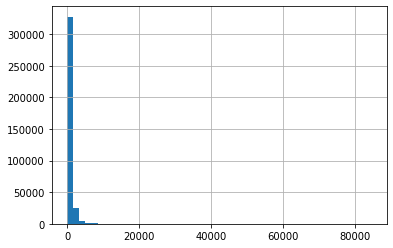

In [20]:
visits['visits_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['visits_duration_sec'].hist(bins=50)

In this case i'm going to use mode() function to calculate the average sessions length

In [21]:
asl = visits['visits_duration_sec'].mode()
asl

0    60
dtype: int64

60 seconds. This may be enough in order, for example, to quickly plan an evening, or find a specific event, but it is hardly enough for planning leisure activities and looking for interesting events in the future.

### Step3

Now let's find out when do people start buying. To do this, we need to find out how much time has passed from the moment of registration to the first purchase. You can identify the average term for all users, but it would be more revealing to divide users into cohorts by month, group them by time to conversion, and see the behavior of each cohort. It will also be interesting to see who buys faster: desktop or touch users.

Let's define the date of the first visit (registration)

In [22]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,visits_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [23]:
first_visit = visits.groupby(['uid']).agg({'visits_date': 'min'}).reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head() 

,uid,first_visit
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


I will determine the month of the first visit

In [24]:
first_visit['first_visit_month'] = first_visit['first_visit'].astype('datetime64[M]')
first_visit.head()

,uid,first_visit,first_visit_month
0,11863502262781,2018-03-01,2018-03-01
1,49537067089222,2018-02-06,2018-02-01
2,297729379853735,2017-06-07,2017-06-01
3,313578113262317,2017-09-18,2017-09-01
4,325320750514679,2017-09-30,2017-09-01


Now let's see the date of the first order

In [25]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [26]:
first_order = orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order']
first_order['first_order'] = first_order['first_order'].dt.date
first_order.head() 

,uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


I will combine the data into one table

In [27]:
orders_ = pd.merge(orders,first_order, on='uid')
orders_.head()

,buy_ts,revenue,uid,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [28]:
orders_total = pd.merge(orders_,first_visit, on='uid')
orders_total.head()

,buy_ts,revenue,uid,first_order,first_visit,first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


I will calculate the conversion time

In [29]:
orders_total['time_to_conversion'] = orders_total['first_order'] - orders_total['first_visit']
conversion_time = orders_total.pivot_table(index='first_visit_month', columns='time_to_conversion', values='uid', aggfunc=['count','nunique'])
conversion_time

count                                                   \
time_to_conversion  0 days 1 days 2 days 3 days 4 days 5 days 6 days 7 days   
first_visit_month                                                             
2017-06-01          3226.0  214.0  306.0   43.0  201.0   51.0   46.0   17.0   
2017-07-01          1935.0  135.0   49.0   42.0   24.0   34.0   29.0   19.0   
2017-08-01          1451.0  257.0   24.0   15.0   18.0   12.0   12.0   12.0   
2017-09-01          2517.0  193.0   62.0   45.0   40.0   55.0   38.0   58.0   
2017-10-01          4088.0  299.0  104.0   87.0   70.0   51.0   61.0   67.0   
2017-11-01          3606.0  387.0  137.0  191.0   80.0   51.0   52.0  168.0   
2017-12-01          3557.0  354.0  133.0   66.0  157.0   46.0   38.0   29.0   
2018-01-01          2646.0  267.0   96.0   61.0   34.0   64.0   34.0   26.0   
2018-02-01          2761.0  266.0   86.0   64.0   51.0   95.0   29.0   37.0   
2018-03-01          2770.0  249.0   64.0   34.0   22.0   27.0   28.0   23.0   
2018-04-01          1661.0  186.0   44.0   37.0   42.0   21.0   52.0   28.0   
2018-05-01          2116.0  164.0   49.0   22.0   18.0    8.0   10.0   17.0   

                                  ...  nunique                             \
time_to_conversion 8 days 9 days  ... 348 days 349 days 350 days 352 days   
first_visit_month                 ...                                       
2017-06-01           24.0  160.0  ...      3.0      4.0      1.0      2.0   
2017-07-01           13.0   19.0  ...      NaN      NaN      NaN      NaN   
2017-08-01           11.0    8.0  ...      NaN      NaN      NaN      NaN   
2017-09-01           19.0   14.0  ...      NaN      NaN      NaN      NaN   
2017-10-01           36.0   18.0  ...      NaN      NaN      NaN      NaN   
2017-11-01           31.0   34.0  ...      NaN      NaN      NaN      NaN   
2017-12-01           34.0   19.0  ...      NaN      NaN      NaN      NaN   
2018-01-01           36.0   16.0  ...      NaN      NaN      NaN      NaN   
2018-02-01           27.0   32.0  ...      NaN      NaN      NaN      NaN   
2018-03-01           13.0   43.0  ...      NaN      NaN      NaN      NaN   
2018-04-01           15.0    8.0  ...      NaN      NaN      NaN      NaN   
2018-05-01            9.0   12.0  ...      NaN      NaN      NaN      NaN   

                                                                          
time_to_conversion 353 days 355 days 356 days 357 days 358 days 363 days  
first_visit_month                                                         
2017-06-01              1.0      2.0      2.0      3.0      1.0      2.0  
2017-07-01              NaN      NaN      NaN      NaN      NaN      NaN  
2017-08-01              NaN      NaN      NaN      NaN      NaN      NaN  
2017-09-01              NaN      NaN      NaN      NaN      NaN      NaN  
2017-10-01              NaN      NaN      NaN      NaN      NaN      NaN  
2017-11-01              NaN      NaN      NaN      NaN      NaN      NaN  
2017-12-01              NaN      NaN      NaN      NaN      NaN      NaN  
2018-01-01              NaN      NaN      NaN      NaN      NaN      NaN  
2018-02-01              NaN      NaN      NaN      NaN      NaN      NaN  
2018-03-01              NaN      NaN      NaN      NaN      NaN      NaN  
2018-04-01              NaN      NaN      NaN      NaN      NaN      NaN  
2018-05-01              NaN      NaN      NaN      NaN      NaN      NaN  

[12 rows x 698 columns]

In [30]:
orders_total['time_to_conversion'].describe()

count                      50415
mean     17 days 14:40:09.997024
std      46 days 11:15:36.419743
min              0 days 00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              4 days 00:00:00
max            363 days 00:00:00
Name: time_to_conversion, dtype: object

As we can see, the majority of users across all cohorts make a purchase on the day of registration. This is most likely due to the fact that most people register after the decision to purchase tickets for an event of interest to them. But some users make a purchase later.
Let's see how many purchases are made on average by users of each cohort and what is the size of the average purchase.

In [31]:
orders_total.head()

,buy_ts,revenue,uid,first_order,first_visit,first_visit_month,time_to_conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0 days


I will highlight the month of the first purchase and the month of purchase

In [32]:
orders_total['first_order_month'] = orders_total['first_order'].astype('datetime64[M]')
orders_total['order_month'] = orders_total['buy_ts'].astype('datetime64[M]')
orders_total.head()

,buy_ts,revenue,uid,first_order,first_visit,first_visit_month,time_to_conversion,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01


I will count the number of buyers in each cohort by month

In [33]:
cohort_sizes = orders_total.groupby(['first_order_month','order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,order_month,n_buyers
0,2017-06-01,2017-06-01,2023
1,2017-06-01,2017-07-01,61
2,2017-06-01,2017-08-01,50
3,2017-06-01,2017-09-01,54
4,2017-06-01,2017-10-01,88


I will also count the number of purchases

In [34]:
cohort_orders = orders_total.groupby(['first_order_month','order_month']).agg({'revenue': 'count'}).reset_index()
cohort_orders.columns = ['first_order_month', 'order_month', 'n_purchases']
cohort_orders.head()

,first_order_month,order_month,n_purchases
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [35]:
report_ = pd.merge(cohort_sizes, cohort_orders, on=['first_order_month','order_month'])
report_.head() 

,first_order_month,order_month,n_buyers,n_purchases
0,2017-06-01,2017-06-01,2023,2354
1,2017-06-01,2017-07-01,61,177
2,2017-06-01,2017-08-01,50,174
3,2017-06-01,2017-09-01,54,226
4,2017-06-01,2017-10-01,88,292


Let's calculate the average number of purchases per customer

In [36]:
report_['avg_purchases_per_user'] = report_['n_purchases'] / report_['n_buyers']
report_.head(10)

,first_order_month,order_month,n_buyers,n_purchases,avg_purchases_per_user
0,2017-06-01,2017-06-01,2023,2354,1.163618
1,2017-06-01,2017-07-01,61,177,2.901639
2,2017-06-01,2017-08-01,50,174,3.480000
3,2017-06-01,2017-09-01,54,226,4.185185
4,2017-06-01,2017-10-01,88,292,3.318182
5,2017-06-01,2017-11-01,67,218,3.253731
6,2017-06-01,2017-12-01,62,276,4.451613
7,2017-06-01,2018-01-01,47,174,3.702128
8,2017-06-01,2018-02-01,58,212,3.655172
9,2017-06-01,2018-03-01,45,153,3.400000


In [37]:
purchases_per_user = report_.pivot_table(index='first_order_month', columns='order_month', values='avg_purchases_per_user', aggfunc='mean')
purchases_per_user

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642,NaN
2017-07-01,NaN,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,NaN,NaN,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN
2017-09-01,NaN,NaN,NaN,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN
2017-10-01,NaN,NaN,NaN,NaN,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121554,1.964912,1.915663,1.488372,1.733333,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121611,1.881356,1.431034,1.794872,NaN


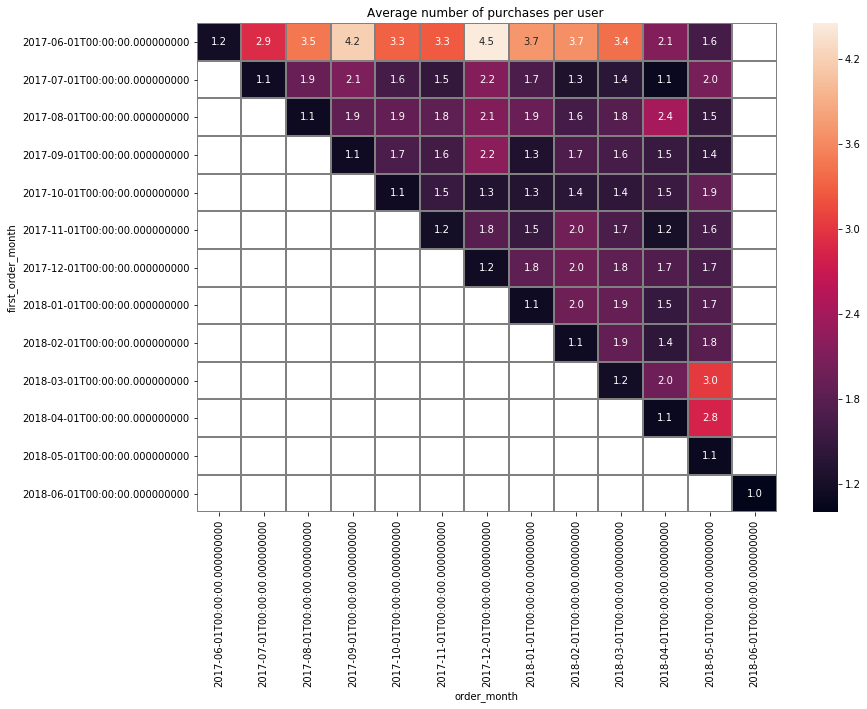

In [38]:
plt.figure(figsize=(13, 9))
plt.title('Average number of purchases per user ')
sns.heatmap(purchases_per_user, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 

After registering, users generally make one purchase. But in the following months, the number of purchases from users who continue to use Yandex.Afisha increases. The maximum purchases per user are in the first cohort in the month of December.

Let's calculate the average purchase amount

In [39]:
cohorts = orders_total.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [40]:
report = pd.merge(report_, cohorts, on=['first_order_month', 'order_month'])
report.head() 

,first_order_month,order_month,n_buyers,n_purchases,avg_purchases_per_user,revenue
0,2017-06-01,2017-06-01,2023,2354,1.163618,9557.49
1,2017-06-01,2017-07-01,61,177,2.901639,981.82
2,2017-06-01,2017-08-01,50,174,3.480000,885.34
3,2017-06-01,2017-09-01,54,226,4.185185,1931.30
4,2017-06-01,2017-10-01,88,292,3.318182,2068.58


In [41]:
report['avg_purchase_size'] = report['revenue'] / report['n_purchases']
report.head()

,first_order_month,order_month,n_buyers,n_purchases,avg_purchases_per_user,revenue,avg_purchase_size
0,2017-06-01,2017-06-01,2023,2354,1.163618,9557.49,4.060106
1,2017-06-01,2017-07-01,61,177,2.901639,981.82,5.547006
2,2017-06-01,2017-08-01,50,174,3.480000,885.34,5.088161
3,2017-06-01,2017-09-01,54,226,4.185185,1931.30,8.545575
4,2017-06-01,2017-10-01,88,292,3.318182,2068.58,7.084178


In [42]:
purchase_size = report.pivot_table(index='first_order_month', columns='order_month', values='avg_purchase_size', aggfunc='mean')
purchase_size

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093,NaN
2017-07-01,NaN,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,NaN,NaN,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN
2017-09-01,NaN,NaN,NaN,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN
2017-10-01,NaN,NaN,NaN,NaN,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687417,4.438482,6.454969,7.524844,2.711282,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.706266,4.576486,3.453735,3.867143,NaN


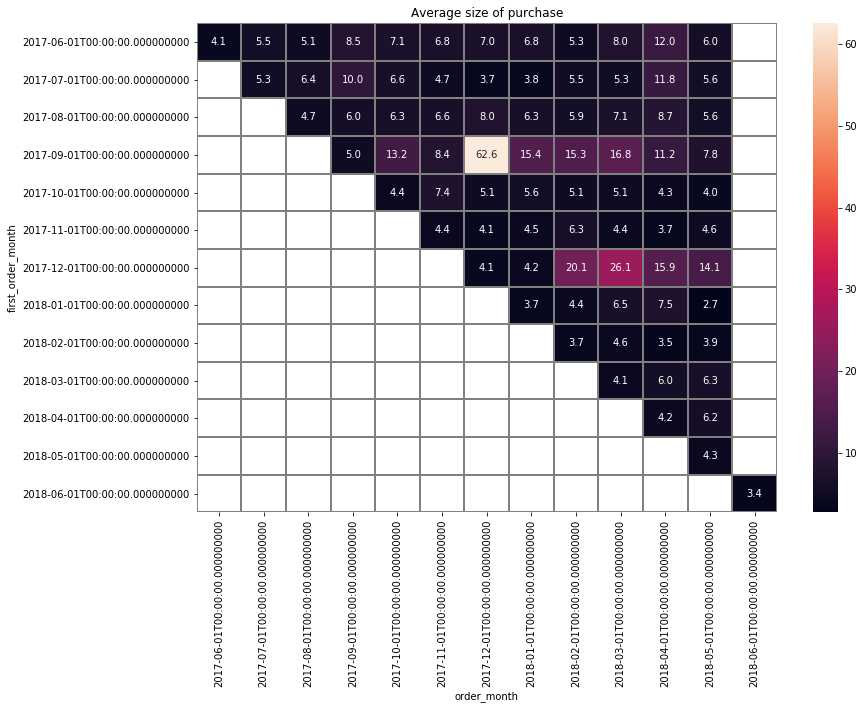

In [43]:
plt.figure(figsize=(13, 9))
plt.title('Average size of purchase')
sns.heatmap(purchase_size, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 

In [44]:
report['avg_purchase_size'].describe()

count    79.000000
mean      7.648922
std       7.476725
min       2.711282
25%       4.406610
50%       5.648302
75%       7.464986
max      62.570244
Name: avg_purchase_size, dtype: float64

Average purchase size is 5.5. Moreover, the user's first purchase is usually even less than the average. The highest values are in December, February and March, but only in two cohorts. Perhaps users from these cohorts received some kind of special offer or special advertising.

### Step4

Let's calculate LTV. From the description of the data provided, we can conclude that the indicated revenue is the direct income of the company from ticket sales, so I will define a margin_rate of 100%

In [45]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,order_month,n_buyers,n_purchases,avg_purchases_per_user,revenue,avg_purchase_size,gp,age
0,2017-06-01,2017-06-01,2023,2354,1.163618,9557.49,4.060106,9557.49,0
1,2017-06-01,2017-07-01,61,177,2.901639,981.82,5.547006,981.82,1
2,2017-06-01,2017-08-01,50,174,3.480000,885.34,5.088161,885.34,2
3,2017-06-01,2017-09-01,54,226,4.185185,1931.30,8.545575,1931.30,3
4,2017-06-01,2017-10-01,88,292,3.318182,2068.58,7.084178,2068.58,4


In [46]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,16.1,17.71,35.76,23.51,22.21,31.01,25.03,19.3,27.23,25.68,9.8
2017-07-01,6.01,12.4,21.04,10.79,6.94,7.9,6.42,6.99,7.38,12.86,11.51,
2017-08-01,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,,
2017-09-01,5.64,22.19,13.45,138.67,19.88,26.1,27.44,16.96,11.04,,,
2017-10-01,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,,,,
2017-11-01,5.15,7.34,6.79,12.51,7.46,4.58,7.56,,,,,
2017-12-01,4.74,7.82,39.37,48.14,27.43,23.52,,,,,,
2018-01-01,4.14,8.72,12.37,11.2,4.7,,,,,,,
2018-02-01,4.16,8.61,4.94,6.94,,,,,,,,


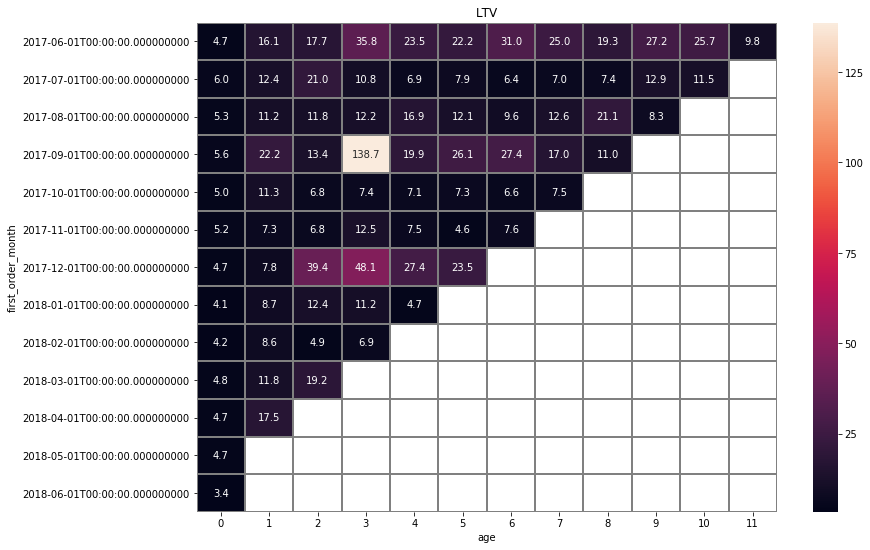

In [47]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 

Let's see how much each client from the first cohort brought on average

In [48]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706 

258.06

258 

I will calculate LTV by resources

In [49]:
source = visits.loc[:,['source_id', 'uid']]
source

,source_id,uid
0,4,16879256277535980062
1,2,104060357244891740
2,5,7459035603376831527
3,9,16174680259334210214
4,3,9969694820036681168
...,...,...
359395,2,18363291481961487539
359396,1,18370831553019119586
359397,4,18387297585500748294
359398,5,18388616944624776485


In [50]:
orders_source = pd.merge(orders_total, source, on='uid')
orders_source.head(10)

,buy_ts,revenue,uid,first_order,first_visit,first_visit_month,time_to_conversion,first_order_month,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,3
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,3
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,5
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,5
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,1
9,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01,0 days,2017-06-01,2017-06-01,2


I will group by month of the first order and by resource

In [51]:
revenue_per_source = orders_source.groupby(['first_order_month', 'source_id']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
revenue_per_source.columns = ['first_order_month', 'source_id', 'revenue_per_source', 'buyers_per_source']
revenue_per_source

,first_order_month,source_id,revenue_per_source,buyers_per_source
0,2017-06-01,1,1.183274e+06,401
1,2017-06-01,2,8.508961e+05,457
2,2017-06-01,3,5.991395e+04,874
3,2017-06-01,4,1.330580e+05,644
4,2017-06-01,5,4.817603e+05,571
...,...,...,...,...
81,2018-05-01,4,6.864090e+03,987
82,2018-05-01,5,4.812780e+03,703
83,2018-05-01,9,5.606800e+02,98
84,2018-05-01,10,1.390990e+03,164


In [52]:
revenue_per_source['ltv'] = revenue_per_source['revenue_per_source'] / revenue_per_source['buyers_per_source']

output_sources = revenue_per_source.pivot_table(
    index='first_order_month', 
    columns='source_id', 
    values='ltv', 
    aggfunc='mean').round(2)

output_sources.fillna('') 

source_id,1,2,3,4,5,7,9,10
first_order_month,,,,,,,,
2017-06-01,2950.81,1861.92,68.55,206.61,843.71,,27.06,31.42
2017-07-01,651.98,213.05,69.31,98.78,59.98,,25.69,8.92
2017-08-01,382.88,257.98,21.46,52.32,326.4,1.22,26.23,9.75
2017-09-01,359.07,1902.05,56.14,116.13,345.15,,14.41,5.35
2017-10-01,65.19,79.02,10.59,14.08,23.16,,10.82,4.64
2017-11-01,152.2,108.45,20.37,35.72,32.32,,15.89,11.57
2017-12-01,37.73,214.26,7.11,8.61,40.27,,8.91,5.39
2018-01-01,104.67,80.97,10.59,10.53,36.97,,6.45,3.97
2018-02-01,48.69,28.78,7.8,8.74,13.92,,7.38,5.08


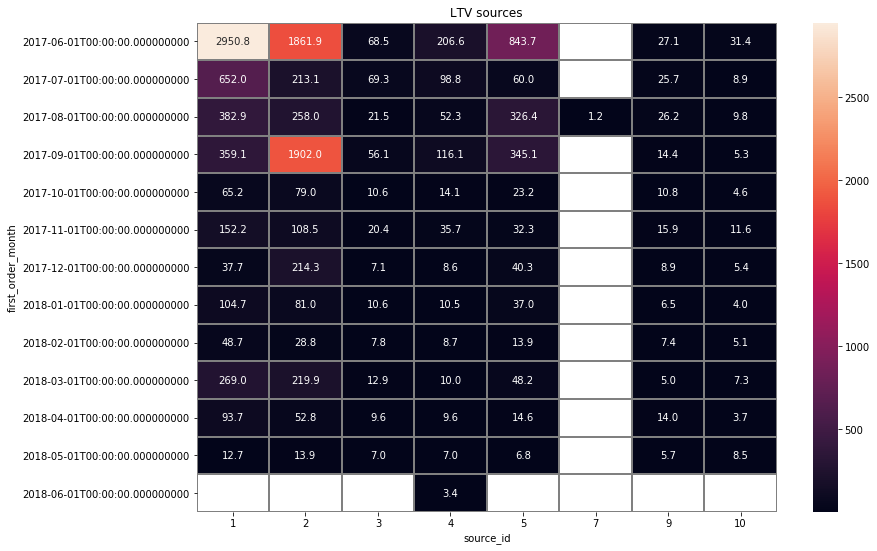

In [53]:
plt.figure(figsize=(13, 9))
plt.title('LTV sources')
sns.heatmap(output_sources, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 

The first and second resources have the highest LTV rates. I will calculate the average LTV for each resource

In [54]:
revenue_per_source_total = revenue_per_source.groupby(['source_id']).agg({'revenue_per_source': 'sum', 'buyers_per_source': 'sum'}).reset_index()
revenue_per_source_total['ltv'] = revenue_per_source_total['revenue_per_source'] / revenue_per_source_total['buyers_per_source']
revenue_per_source_total

,source_id,revenue_per_source,buyers_per_source,ltv
0,1,2.298200e+06,7138,321.966961
1,2,2.638189e+06,7305,361.148420
2,3,2.966880e+05,13846,21.427702
3,4,4.966902e+05,14253,34.848114
4,5,1.181477e+06,10156,116.332920
5,7,1.220000e+00,1,1.220000
6,9,3.634225e+04,2793,13.011905
7,10,1.461923e+04,1773,8.245477


Despite the fact that 1st and 2d resources brought fewer clients than 3d, 4th and 5th, the client's LTV on these resources is incomparably higher. Perhaps by focusing on attracting more customers from these resources, the company can increase its profits.

### Step5

Now let's calculate the marketing costs

In [55]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [56]:
costs['month'] = costs['dt'].astype('datetime64[M]') 
total_cost = costs['costs'].sum()
total_cost

329131.62

A total of 329,131.62 were spent for the entire period. Let's see how much was spent on different resources

In [57]:
cost_per_source = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
cost_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


I will calculate how much was spent monthly

In [58]:
cost_per_month = costs.groupby(['month']).agg({'costs': 'sum'}).reset_index()
cost_per_month.columns = ['month', 'cost_per_month']
cost_per_month

,month,cost_per_month
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Let's calculate CAC and ROMI based on monthly expenses

In [59]:
report_1 = pd.merge(report, cost_per_month, left_on='first_order_month', right_on='month')
report_1['cac'] = report_1['cost_per_month'] / report_1['n_buyers']
report_1.head() 

,first_order_month,order_month,n_buyers,n_purchases,avg_purchases_per_user,revenue,avg_purchase_size,gp,age,ltv,month,cost_per_month,cac
0,2017-06-01,2017-06-01,2023,2354,1.163618,9557.49,4.060106,9557.49,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2017-07-01,61,177,2.901639,981.82,5.547006,981.82,1,16.095410,2017-06-01,18015.0,295.327869
2,2017-06-01,2017-08-01,50,174,3.480000,885.34,5.088161,885.34,2,17.706800,2017-06-01,18015.0,360.300000
3,2017-06-01,2017-09-01,54,226,4.185185,1931.30,8.545575,1931.30,3,35.764815,2017-06-01,18015.0,333.611111
4,2017-06-01,2017-10-01,88,292,3.318182,2068.58,7.084178,2068.58,4,23.506591,2017-06-01,18015.0,204.715909


In [60]:
report_1['romi'] = report_1['ltv'] / report_1['cac']
output2 = report_1.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output2.cumsum(axis=1).round(2) 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the results obtained, we can conclude that only two cohorts recouped the costs of recruiting. Let's take a look at the average ROI of all cohorts.

In [61]:
output2.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

It turns out that cohorts only pay off by 11 months.

Let's see what resources are the most profitable for advertising investments

In [62]:
source_cac = pd.merge(revenue_per_source_total, cost_per_source, on='source_id')
source_cac['cac'] = source_cac['costs'] / source_cac['buyers_per_source']
source_cac

,source_id,revenue_per_source,buyers_per_source,ltv,costs,cac
0,1,2.298200e+06,7138,321.966961,20833.27,2.918642
1,2,2.638189e+06,7305,361.148420,42806.04,5.859828
2,3,2.966880e+05,13846,21.427702,141321.63,10.206676
3,4,4.966902e+05,14253,34.848114,61073.60,4.284965
4,5,1.181477e+06,10156,116.332920,51757.10,5.096209
5,9,3.634225e+04,2793,13.011905,5517.49,1.975471
6,10,1.461923e+04,1773,8.245477,5822.49,3.283976


In [63]:
source_cac['romi'] = source_cac['ltv'] / source_cac['cac']
output_source = source_cac.pivot_table(
    index='source_id',  
    values='romi', 
    aggfunc='mean')

output_source.cumsum(axis=1).round(2)

,romi
source_id,
1,110.31
2,61.63
3,2.10
4,8.13
5,22.83
9,6.59
10,2.51


Definitely the most cost-effective resource is number 1, number 2 also should not be discounted.

<a id="oc"></a>

## Overall conclusion

Conclusions:
- A fairly large number of users remain on the service.
- Average session length 60 seconds. This may be enough in order, for example, to quickly plan an evening, or find a specific event, but it is hardly enough for planning leisure activities and looking for interesting events in the future.
- The desktop version is used twice more often then touch screen.
- from October to March, the number of users increases significantly. It is quite understandable that in the cold season the demand for events increases.
- Most users make a purchase on the same day they sign up.
- Over time, the average number of purchases per user increases.
- The average purchase value is also increasing, this is especially true for the holiday months, such as December, February, March. In some cohorts, the increase was manifold.
- The most profitable in terms of return on investment turned out to be resources 1 and 2.
- Resources 3,4 and 5 bring in the most customers, but these customers bring in little money

Recommendations:
- Increase the number of advertisements on resources 1 and 2
- Increase conversion for resources 3, 4 and 5
- Take into account the seasonality of demand
- To study why the desktop version is used more, despite the fact that many people mainly use smartphones. Perhaps there are some inconveniences in using the touchscreen. Eliminating the inconvenience could increase conversions and profits.
- Evaluate the marketing strategy for cohorts where sales increased significantly during the holiday months and use these findings in subsequent work.